# Project

In this project, our aim is to building a model for predicting wine qualities. Our label will be `quality` column. Do not forget, this is a Classification problem!

## Steps
- Read the `winequality.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Abdul Ahmed Abdul
</h2>

# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read csv
df = pd.read_csv("winequality.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Describe our data
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
# different analysis on Exploratory Data Analysis section
# Analyse missing values

print("Rows, columns:" + str(data.shape))

info=df.info()
print(info)

Rows, columns:(1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


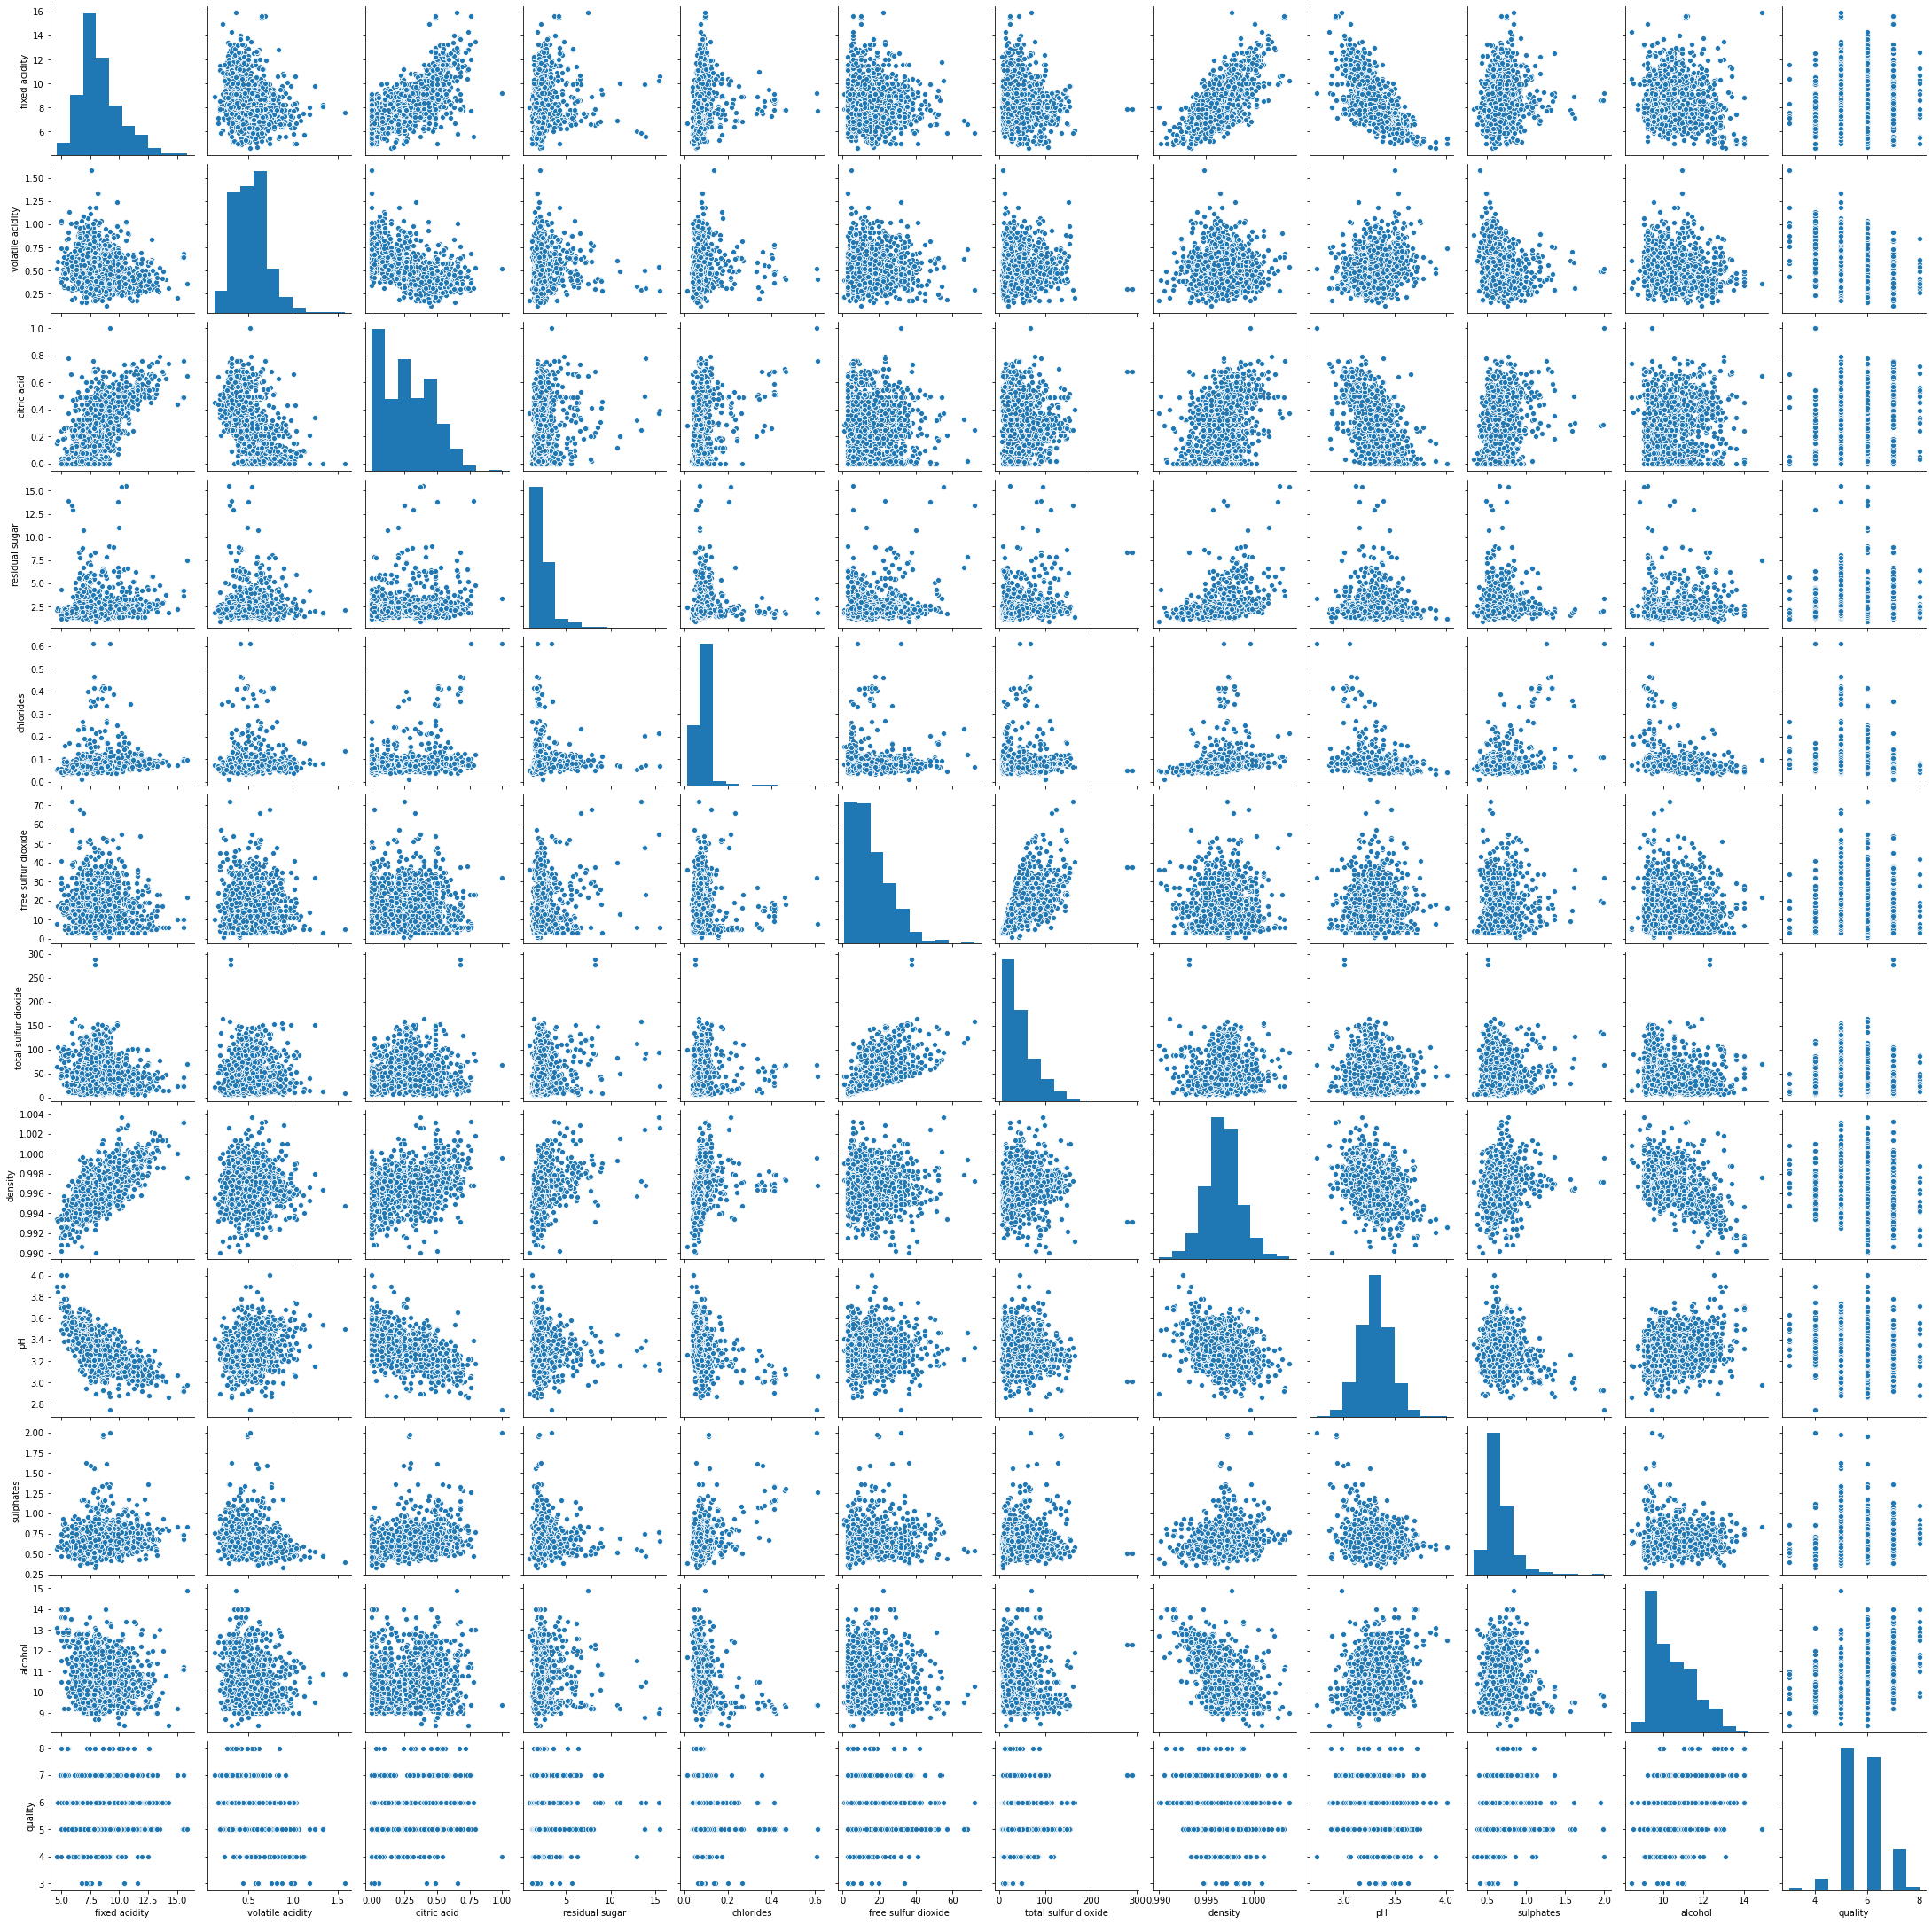

In [9]:
sns.pairplot(df)
#grid of axes of each numeric variable

In [90]:
#check for missing values
print(df.isnull().any())
print("None of the values is missing")

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
goodquality             False
dtype: bool
None of the values is missing


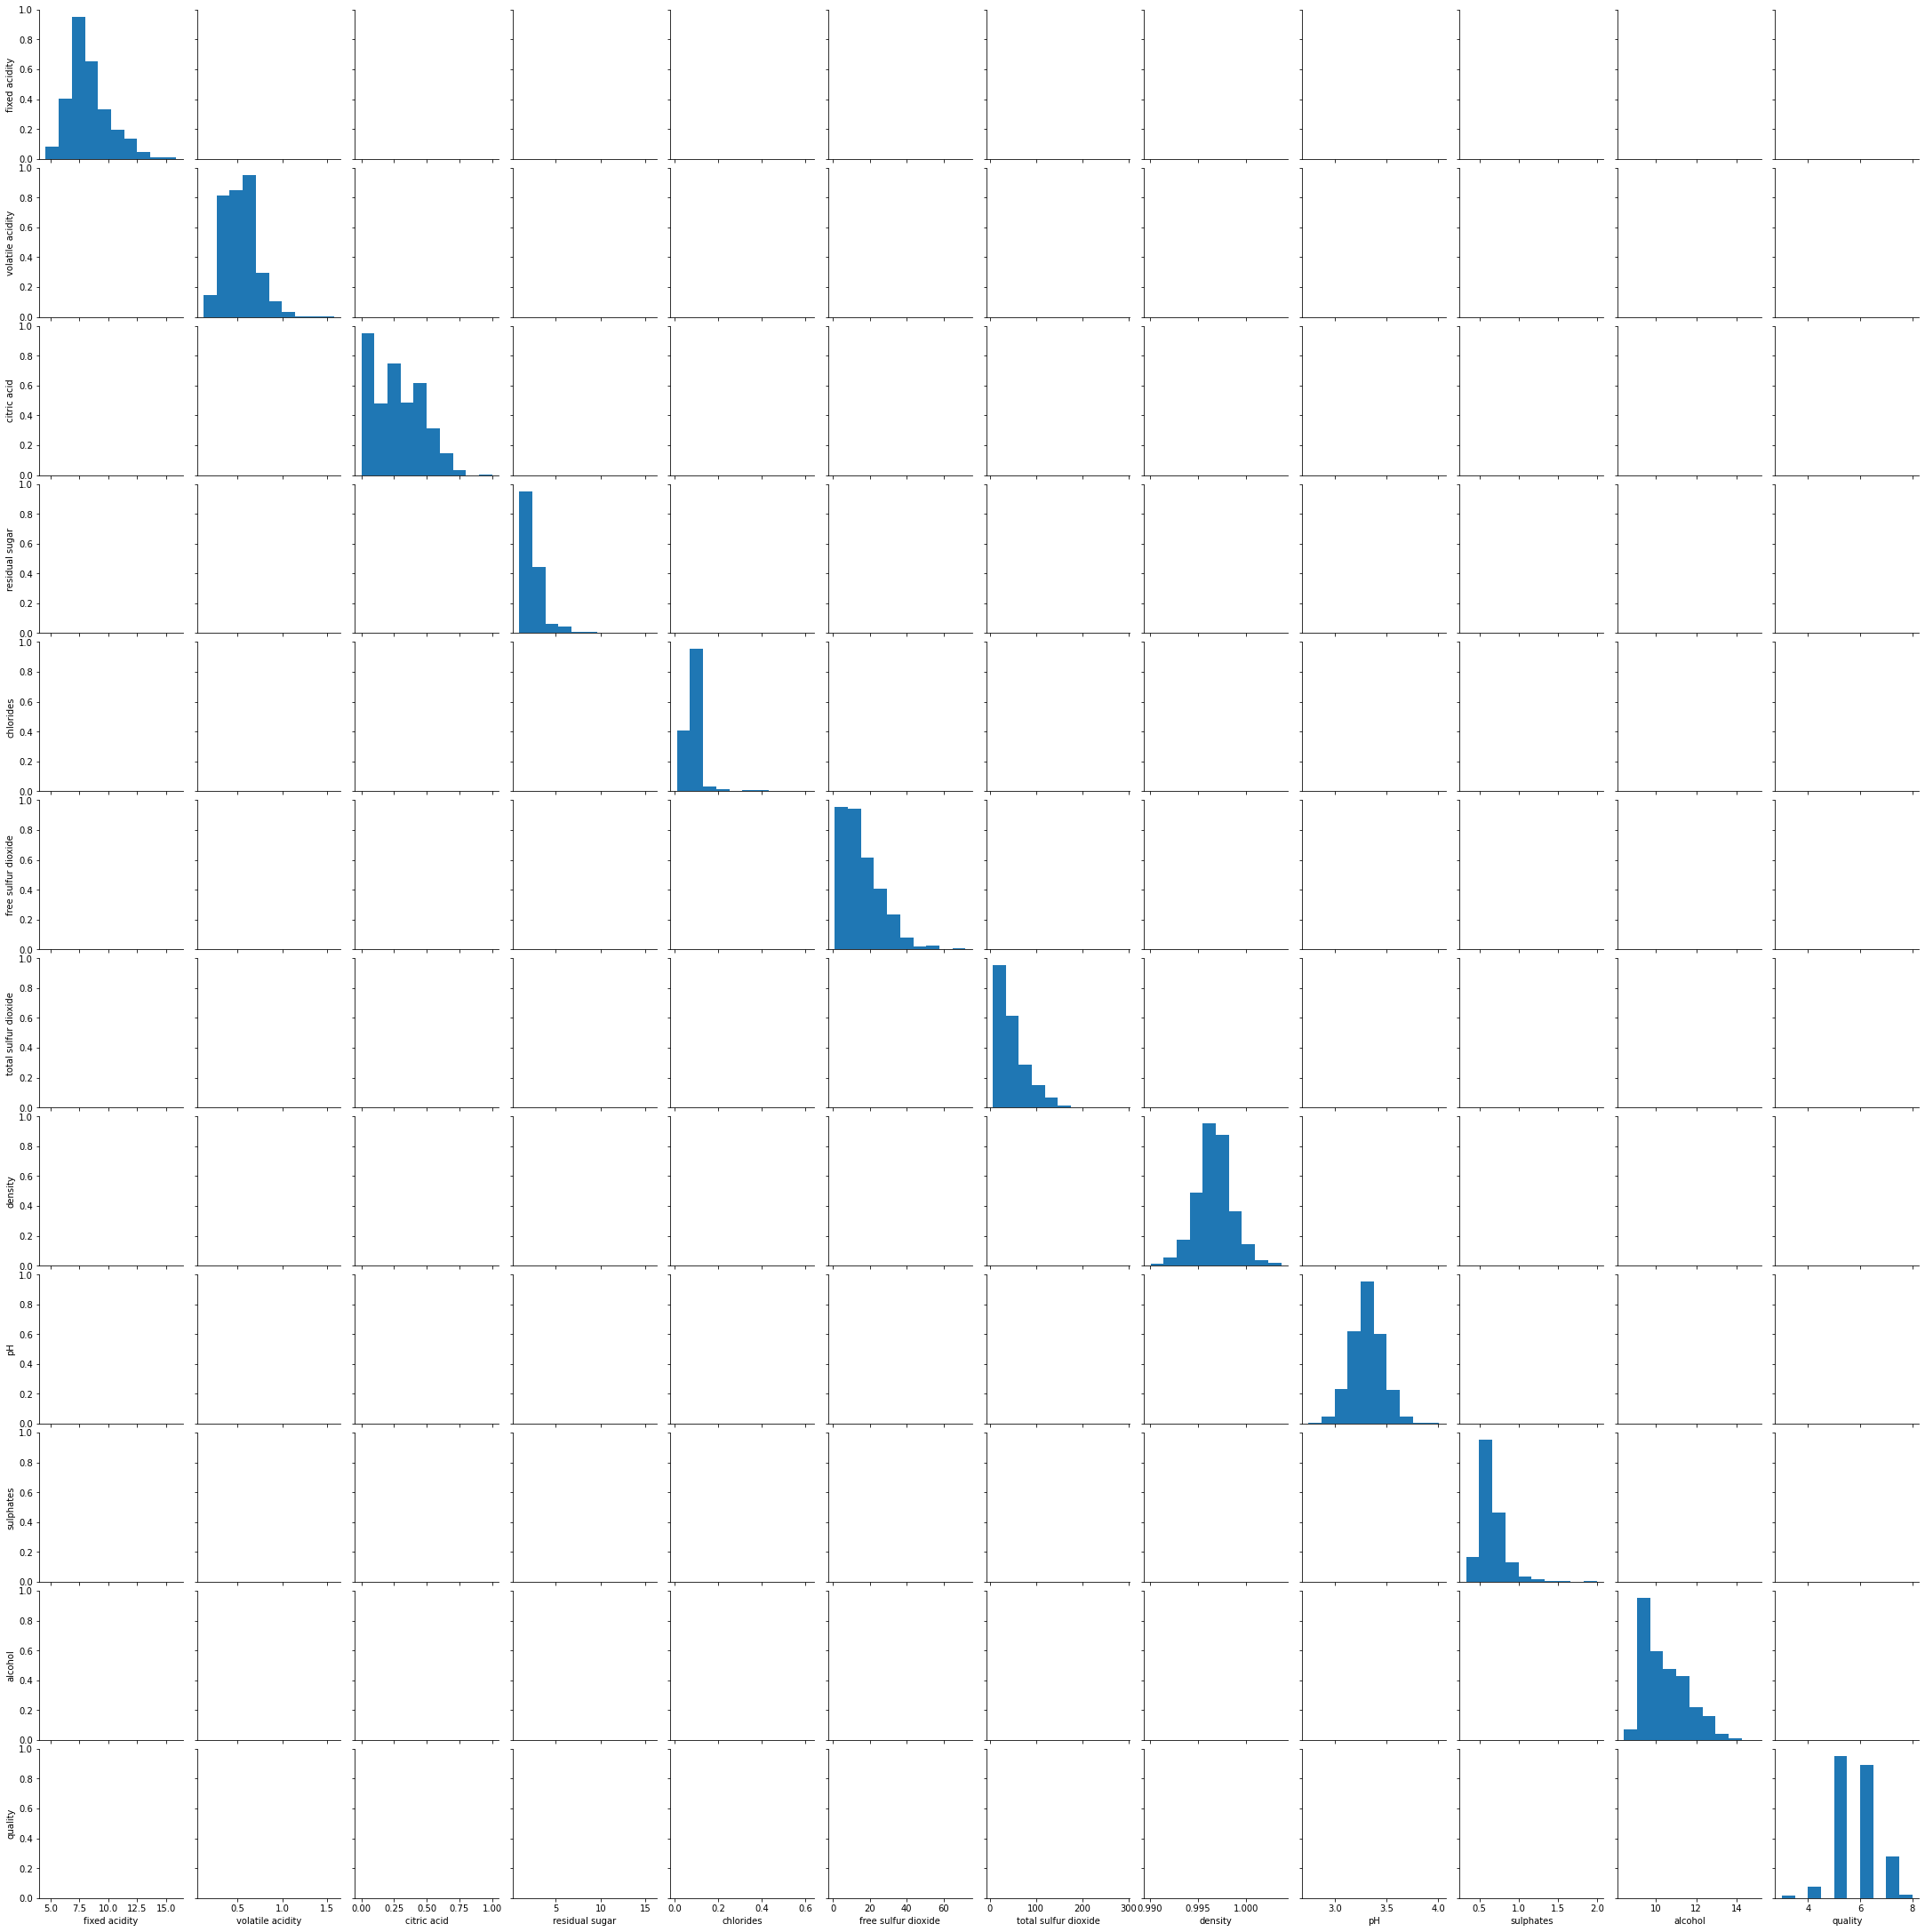

In [11]:
sns.pairplot(df,kind="kde")

In [14]:
df.shape

(1599, 12)

# Exploratory Data Analysis

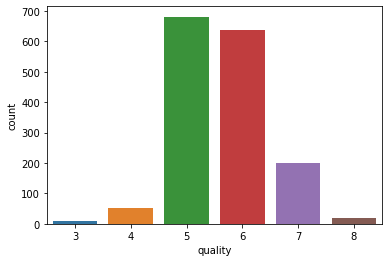

In [64]:
# Our label Distribution (countplot)
sns.countplot(x="quality", data = df)
plt.show()

In [96]:
# Example EDA (distplot)
sns.distplot(df.citric acid);
plt.show()

SyntaxError: invalid syntax (<ipython-input-96-59b503b1a423>, line 2)

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

In [30]:
duplicates=df.duplicated()
print(sum(duplicates))

240


In [31]:
# I need to to add one more feature so i can define a bottle of wine as "good quality" if it had a 
# quality score of 7 or higher, and if it had a quality score of less than 7, it is tag "bad quality

df["goodquality"] = [1 if x >= 7 else 0 for x in data["quality"]]

X = df.drop(["quality", "goodquality"], axis = 1)
y= df["goodquality"]

In [32]:
#See proportion of Good vs Bad wines
proportion= df["goodquality"].value_counts()
print(proportion)
#Based on the result below, it seemed like the numbers are fair enough.

0    1382
1     217
Name: goodquality, dtype: int64


In [33]:
#Normalize feature variaables

from sklearn.preprocessing import StandardScaler
X_features = X
X= StandardScaler().fit_transform(X)

In [34]:
#Splitting the data into training and test set so i could cross-validate my models and dtermine their effectiveness
#70% for training, 30% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [35]:
#Model 1: Decision trees
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(random_state=0)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

           0       0.92      0.92      0.92       980
           1       0.45      0.45      0.45       140

    accuracy                           0.86      1120
   macro avg       0.69      0.69      0.69      1120
weighted avg       0.86      0.86      0.86      1120



In [36]:
model1 = DecisionTreeClassifier(max_depth=5, random_state=0)
model1.fit(X_train,y_train)
print("Accuracy of train:",model1.score(X_train,y_train))
print("Accuracy of test:",model1.score(X_test,y_test))

Accuracy of train: 0.9436325678496869
Accuracy of test: 0.85625


In [37]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

y_pred = model1.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred1))
print("Precision:",precision_score(y_test,y_pred1))
print("Recall:",recall_score(y_test,y_pred1))
print("F1 Score:",f1_score(y_test,y_pred1))

Accuracy: 0.8633928571428572
Precision: 0.45323741007194246
Recall: 0.45
F1 Score: 0.4516129032258065


In [38]:
#Model 2:  Random Forest
from sklearn.ensemble import RandomForestClassifier

model2= RandomForestClassifier(random_state = 0)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       980
           1       0.57      0.39      0.47       140

    accuracy                           0.89      1120
   macro avg       0.74      0.68      0.70      1120
weighted avg       0.87      0.89      0.88      1120



In [39]:
model2 = RandomForestClassifier(random_state=0)
model2.fit(X_train,y_train)
print("Accuracy of train:",model2.score(X_train,y_train))
print("Accuracy of test:",model2.score(X_test,y_test))

Accuracy of train: 1.0
Accuracy of test: 0.8875


In [40]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

y_pred = model2.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred2))
print("Precision:",precision_score(y_test,y_pred2))
print("Recall:",recall_score(y_test,y_pred2))
print("F1 Score:",f1_score(y_test,y_pred2))

Accuracy: 0.8875
Precision: 0.5729166666666666
Recall: 0.39285714285714285
F1 Score: 0.46610169491525416


In [41]:
#Model 3: Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

model3= GradientBoostingClassifier(random_state=0)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       980
           1       0.49      0.42      0.45       140

    accuracy                           0.87      1120
   macro avg       0.70      0.68      0.69      1120
weighted avg       0.87      0.87      0.87      1120



In [42]:
model3 = GradientBoostingClassifier(random_state=0)
model3.fit(X_train,y_train)
print("Accuracy of train:",model3.score(X_train,y_train))
print("Accuracy of test:",model3.score(X_test,y_test))

Accuracy of train: 0.9937369519832986
Accuracy of test: 0.8723214285714286


In [43]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

y_pred = model3.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred3))
print("Precision:",precision_score(y_test,y_pred3))
print("Recall:",recall_score(y_test,y_pred3))
print("F1 Score:",f1_score(y_test,y_pred3))

Accuracy: 0.8723214285714286
Precision: 0.48760330578512395
Recall: 0.42142857142857143
F1 Score: 0.45210727969348663


# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

By comparing the three models, the random forest seems to yield the highest level of accuracy. it also has a better f1-score for predicting good qaulity wines(1), I am concluding that the Random forest is the best model of the three models used

<AxesSubplot:>

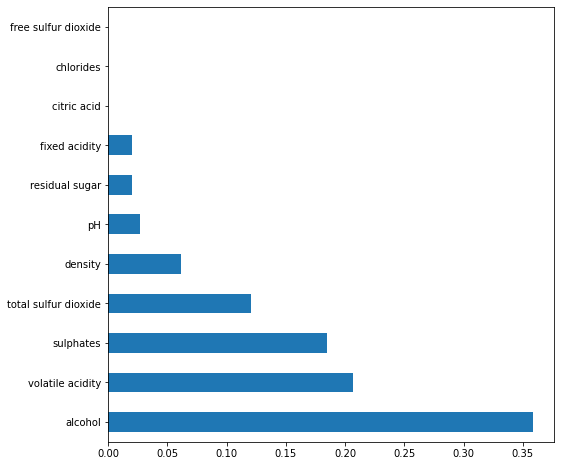

In [47]:
#Model 1: Decision trees
add_importances = pd.Series(model1.feature_importances_, index= X_features.columns)
add_importances.nlargest(20).plot(kind= "barh", figsize=(8,8))

<AxesSubplot:>

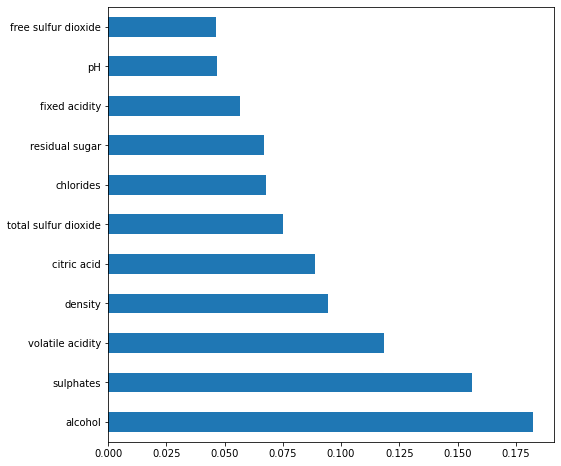

In [48]:
#Model 2:  Random Forest
add_importances1 = pd.Series(model2.feature_importances_, index= X_features.columns)

add_importances1.nlargest(20).plot(kind= "barh", figsize=(8,8))

<AxesSubplot:>

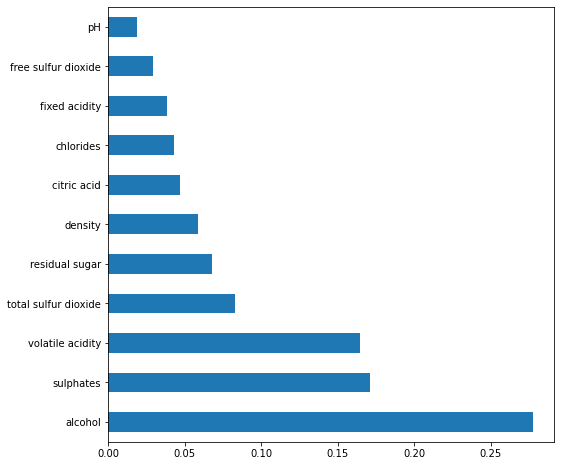

In [50]:
#Model 3:  Gradient Boosting
add_importances2 = pd.Series(model3.feature_importances_, index= X_features.columns)

add_importances2.nlargest(20).plot(kind= "barh", figsize=(8,8))

# Comparing the models

In [52]:
#Filtering data for only good quality
df_temp= df[df["goodquality"]==1]
df_temp.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.0
mean,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949,1.0
std,1.999977,0.144963,0.194438,1.363026,0.028480,10.234615,32.572238,0.002201,0.154478,0.134038,0.998153,0.276443,0.0
min,4.900000,0.120000,0.000000,1.200000,0.012000,3.000000,7.000000,0.990640,2.880000,0.390000,9.200000,7.000000,1.0
25%,7.400000,0.300000,0.300000,2.000000,0.062000,6.000000,17.000000,0.994700,3.200000,0.650000,10.800000,7.000000,1.0
50%,8.700000,0.370000,0.400000,2.300000,0.073000,11.000000,27.000000,0.995720,3.270000,0.740000,11.600000,7.000000,1.0
75%,10.100000,0.490000,0.490000,2.700000,0.085000,18.000000,43.000000,0.997350,3.380000,0.820000,12.200000,7.000000,1.0
max,15.600000,0.915000,0.760000,8.900000,0.358000,54.000000,289.000000,1.003200,3.780000,1.360000,14.000000,8.000000,1.0


In [53]:
#Filtering data for only bad quality
df_temp2 = df[df["goodquality"]==0]
df_temp2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.0
mean,8.236831,0.547022,0.254407,2.512120,0.089281,16.172214,48.285818,0.996859,3.314616,0.644754,10.251037,5.408828,0.0
std,1.682726,0.176337,0.189665,1.415778,0.049113,10.467685,32.585604,0.001808,0.154135,0.170629,0.969664,0.601719,0.0
min,4.600000,0.160000,0.000000,0.900000,0.034000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.0
25%,7.100000,0.420000,0.082500,1.900000,0.071000,8.000000,23.000000,0.995785,3.210000,0.540000,9.500000,5.000000,0.0
50%,7.800000,0.540000,0.240000,2.200000,0.080000,14.000000,39.500000,0.996800,3.310000,0.600000,10.000000,5.000000,0.0
75%,9.100000,0.650000,0.400000,2.600000,0.091000,22.000000,65.000000,0.997900,3.410000,0.700000,10.900000,6.000000,0.0
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,165.000000,1.003690,4.010000,2.000000,14.900000,6.000000,0.0


- By looking into the details, we can see that good quality wines have higher levels of alcohol on average
- Have higher volatile acidity on average
- have higher levels of sulphates on average
- Have higher levels of residual sugar on average